In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import pickle
from joblib import dump, load

In [2]:
df = pd.read_csv('BNB2019-2024.csv')
df1 = df.reset_index()['Open']

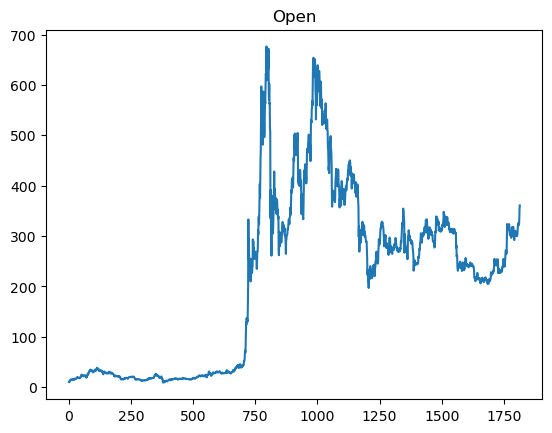

In [3]:
plt.plot(df1)
plt.title("Open")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [5]:
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))


train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [6]:
# 5. Tạo dataset cho mô hình
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
X_train.shape

(1169, 100)

### RandomForest

In [8]:
model=RandomForestRegressor()

In [9]:
# best_parameters

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
# Lưu mô hình vào file
with open('Model/rf.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
# Tải mô hình từ file
with open('Model/rf.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [13]:
train_predict = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)


In [14]:
y_pred

array([0.4410694 , 0.42738763, 0.44040206, 0.43203546, 0.42472955,
       0.42111315, 0.42336037, 0.42192161, 0.42019471, 0.41600234,
       0.41914341, 0.41795204, 0.41939187, 0.4183744 , 0.417524  ,
       0.40386526, 0.39267053, 0.38858844, 0.34843325, 0.3649996 ,
       0.37561069, 0.36708443, 0.3744149 , 0.37556732, 0.37259236,
       0.37269399, 0.36970851, 0.36458086, 0.36874295, 0.37098309,
       0.36670801, 0.37009824, 0.37199424, 0.37236015, 0.36431299,
       0.36480833, 0.37000016, 0.38075183, 0.37312858, 0.37713377,
       0.3802155 , 0.40405883, 0.4073027 , 0.42082788, 0.42184431,
       0.4165137 , 0.42103491, 0.44011256, 0.45729136, 0.44440039,
       0.43765519, 0.42244629, 0.42376476, 0.4437615 , 0.44879601,
       0.44491175, 0.45183621, 0.45514011, 0.44674294, 0.45443069,
       0.45742003, 0.45773908, 0.4672508 , 0.46014556, 0.46466946,
       0.46933449, 0.4754495 , 0.47337832, 0.46714444, 0.46654632,
       0.4667885 , 0.49719676, 0.46413004, 0.45270372, 0.44381

In [15]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i += 1

lst_output = np.array(lst_output).reshape(-1, 1)

### Bagging

In [16]:
from sklearn.ensemble import BaggingRegressor

In [17]:
# Xây dựng mô hình Bagged
bagged_rf = BaggingRegressor(estimator=rf_model, n_estimators=5, random_state=42)

In [18]:
# Huấn luyện mô hình
bagged_rf.fit(X_train, y_train)

BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=5,
                 random_state=42)

In [19]:
#Lưu mô hình
dump(bagged_rf, 'Model/rf_bagging.joblib')

['Model/rf_bagging.joblib']

In [20]:
# Tải mô hình
bagged_rf = load('Model/rf_bagging.joblib')

In [21]:
#Dự đoán
bagged_train_predict = bagged_rf.predict(X_train)
bagged_y_pred = bagged_rf.predict(X_test)

In [22]:
bagged_y_pred

array([0.43832962, 0.42948108, 0.43511446, 0.42954367, 0.42578947,
       0.42212575, 0.42341338, 0.4194372 , 0.4193803 , 0.4179841 ,
       0.41828398, 0.4163627 , 0.41846247, 0.41674878, 0.40992092,
       0.40142924, 0.3977278 , 0.38842686, 0.35854691, 0.3648045 ,
       0.37168638, 0.36827636, 0.37102572, 0.37072323, 0.37222471,
       0.37091805, 0.36937489, 0.36466501, 0.3617269 , 0.36591313,
       0.36481687, 0.36453187, 0.36674944, 0.366246  , 0.36261687,
       0.36110716, 0.36437876, 0.37869791, 0.37247399, 0.3814684 ,
       0.38215019, 0.39529172, 0.39885627, 0.40757135, 0.41302678,
       0.41773701, 0.42215338, 0.4374767 , 0.44596019, 0.44087185,
       0.43469867, 0.42411393, 0.42516761, 0.43991019, 0.44252287,
       0.43913977, 0.44767251, 0.44626759, 0.44419874, 0.4482273 ,
       0.45234843, 0.45461212, 0.46243389, 0.45329466, 0.46211874,
       0.46422486, 0.46850957, 0.47457224, 0.46746913, 0.4677568 ,
       0.46392822, 0.48597026, 0.46290668, 0.44950477, 0.44463

In [23]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input1 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input1[0])
bagg_lst_output1 = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input1 = np.array(temp_input[1:])
        x_input1 = x_input1.reshape(1, -1)
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output1.extend(yhat.tolist())
        i += 1
    else:
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        bagg_lst_output1.extend(yhat.tolist())
        i += 1

bagg_lst_output1 = np.array(bagg_lst_output1).reshape(-1, 1)


In [24]:
# 11. Dự báo giá cho 60 ngày tiếp theo
x_input2 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input2[0])
bagg_lst_output2 = []
n_steps = 100
i = 0
while i < 60:
    if len(temp_input) > 100:
        x_input2 = np.array(temp_input[1:])
        x_input2 = x_input2.reshape(1, -1)
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output2.extend(yhat.tolist())
        i += 1
    else:
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        bagg_lst_output2.extend(yhat.tolist())
        i += 1

bagg_lst_output2 = np.array(bagg_lst_output2).reshape(-1, 1)

In [25]:
# 11. Dự báo giá cho 90 ngày tiếp theo
x_input3 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input3[0])
bagg_lst_output3 = []
n_steps = 100
i = 0
while i < 90:
    if len(temp_input) > 100:
        x_input3 = np.array(temp_input[1:])
        x_input3 = x_input3.reshape(1, -1)
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output3.extend(yhat.tolist())
        i += 1
    else:
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        bagg_lst_output3.extend(yhat.tolist())
        i += 1

bagg_lst_output3 = np.array(bagg_lst_output3).reshape(-1, 1)

### Đánh giá mô hình

In [26]:
#Đánh giá trên tập test
print("Chỉ số MSE trên tập test")
print("Random Forest:", round(metrics.mean_squared_error(y_test, y_pred), 4))
print("Bagging:", round(metrics.mean_squared_error(y_test, bagged_y_pred), 4))


Chỉ số MSE trên tập test
Random Forest: 0.0003
Bagging: 0.0004


### Trực quan

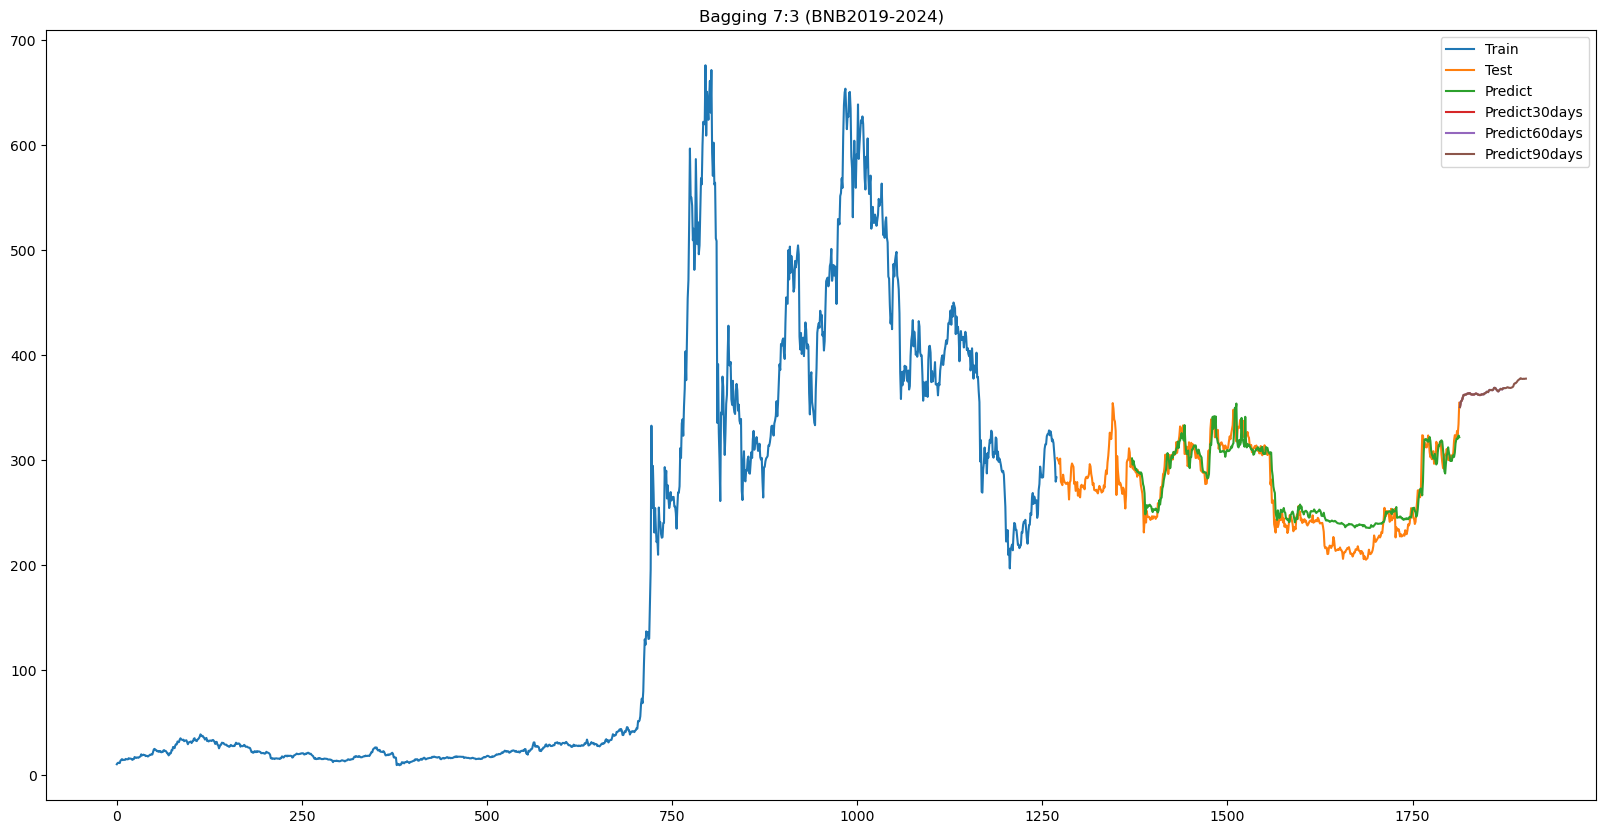

In [29]:
plt.figure(figsize=(20, 10))

plt.title('Bagging 7:3 (BNB2019-2024)')
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(bagged_y_pred.reshape(-1,1)))
prediect_data_index1 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index1,scaler.inverse_transform(bagg_lst_output1))
prediect_data_index2 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index2,scaler.inverse_transform(bagg_lst_output2))
prediect_data_index3 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index3,scaler.inverse_transform(bagg_lst_output3))
plt.legend(['Train','Test','Predict','Predict30days','Predict60days','Predict90days'])
plt.show()